# An Analytical Detective

Crime is an international concern, but it is documented and handled in very different ways in different countries. In the United States, violent crimes and property crimes are recorded by the Federal Bureau of Investigation (FBI).  Additionally, each city documents crime, and some cities release data regarding crime rates. The city of Chicago, Illinois releases crime data from 2001 onward [online](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2).

Chicago is the third most populous city in the United States, with a population of over 2.7 million people. The city of Chicago is shown in the map below, with the state of Illinois highlighted in red. 

<img src="images/ChicagoMap.png"/>

There are two main types of crimes: violent crimes, and property crimes. In this problem, we'll focus on one specific type of property crime, called "*motor vehicle theft*" (sometimes referred to as grand theft auto). This is the act of stealing, or attempting to steal, a car. In this problem, we'll use some basic data analysis in R to understand the motor vehicle thefts in Chicago. 

In [1]:
MVT = read.csv('data/mvtWeek1.csv')
head(MVT)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
,<int>,<fct>,<fct>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,8951354,12/31/12 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164
2,8951141,12/31/12 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130
3,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767
4,8952223,12/31/12 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773
5,8951608,12/31/12 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176
6,8950793,12/31/12 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400


------------------------------------------- List of Descriptions of the Variables ------------------------------------------------------

**ID:** a unique identifier for each observation

**Date:** the date the crime occurred

**LocationDescription:** the location where the crime occurred

**Arrest:** whether or not an arrest was made for the crime (TRUE if an arrest was made, and FALSE if an arrest was not made)

**Domestic:** whether or not the crime was a domestic crime, meaning that it was committed against a family member (TRUE if it was domestic, and FALSE if it was not domestic)

**Beat:** the area, or "beat" in which the crime occurred. This is the smallest regional division defined by the Chicago police department.

**District:** the police district in which the crime occured. Each district is composed of many beats, and are defined by the Chicago Police Department.

**CommunityArea:** the community area in which the crime occurred. Since the 1920s, Chicago has been divided into what are called "community areas", of which there are now 77. The community areas were devised in an attempt to create socially homogeneous regions.

**Year:** the year in which the crime occurred.

**Latitude:** the latitude of the location at which the crime occurred.

**Longitude:** the longitude of the location at which the crime occurred.

------------------------------------------------------------X--X--X--X--X----------------------------------------------------------------------

How many rows of data (observations) are in this dataset?

How many variables are in this dataset?

In [2]:
str(MVT)

'data.frame':	191641 obs. of  11 variables:
 $ ID                 : int  8951354 8951141 8952745 8952223 8951608 8950793 8950760 8951611 8951802 8950706 ...
 $ Date               : Factor w/ 131680 levels "1/1/01 0:01",..: 42824 42823 42823 42823 42822 42821 42820 42819 42817 42816 ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 62 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE FALSE TRUE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 1622 724 211 2521 423 231 1021 1215 ...
 $ District           : int  6 12 16 7 2 25 4 2 10 12 ...
 $ CommunityArea      : int  69 24 11 67 35 19 48 40 29 24 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 42 41.8 41.8 ...
 $ Longitude          : num  -87.6 -87.7 -87.8 -87.7 -87.6 ...


Using the "max" function, what is the maximum value of the variable "ID"?

In [3]:
max(MVT$ID)

[1] 9181151

What is the minimum value of the variable "Beat"?

In [4]:
min(MVT$Beat)

[1] 111

How many observations have value TRUE in the Arrest variable (this is the number of crimes for which an arrest was made)?

In [5]:
table(MVT$Arrest)


 FALSE   TRUE 
176105  15536 

In [6]:
arrest <- MVT[MVT$Arrest == "TRUE",]
head(arrest)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
,<int>,<fct>,<fct>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
6,8950793,12/31/12 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400
9,8951802,12/31/12 19:00,STREET,TRUE,FALSE,1021,10,29,2012,41.86362,-87.70910
14,8950570,12/31/12 16:20,GAS STATION,TRUE,FALSE,825,8,66,2012,41.78455,-87.68393
48,8949895,12/30/12 19:46,ALLEY,TRUE,FALSE,2512,25,18,2012,41.92875,-87.80289
60,8949557,12/30/12 15:00,STREET,TRUE,FALSE,2535,25,23,2012,41.90881,-87.72057
70,8949844,12/30/12 7:15,STREET,TRUE,FALSE,414,4,46,2012,41.74795,-87.56849


How many observations have a LocationDescription value of ALLEY?

In [7]:
alley <- MVT[MVT$LocationDescription=="ALLEY",]
nrow(alley)

[1] 2308

In what format are the entries in the variable Date?

In [8]:
head(MVT)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude
,<int>,<fct>,<fct>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,8951354,12/31/12 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164
2,8951141,12/31/12 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130
3,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767
4,8952223,12/31/12 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773
5,8951608,12/31/12 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176
6,8950793,12/31/12 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400


What is the month and year of the median date in our dataset?

In [9]:
DateConvert = as.Date(strptime(MVT$Date, "%m/%d/%y %H:%M"))
head(DateConvert)

[1] "2012-12-31" "2012-12-31" "2012-12-31" "2012-12-31" "2012-12-31"
[6] "2012-12-31"

In [10]:
summary(DateConvert)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2001-01-01" "2003-07-10" "2006-05-21" "2006-08-23" "2009-10-24" "2012-12-31"

In which month did the fewest motor vehicle thefts occur?

In [11]:
MVT$Month = months(DateConvert)
head(MVT)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month
,<int>,<fct>,<fct>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>
1,8951354,12/31/12 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164,December
2,8951141,12/31/12 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130,December
3,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767,December
4,8952223,12/31/12 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773,December
5,8951608,12/31/12 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176,December
6,8950793,12/31/12 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400,December


In [12]:
table(MVT$Month)


    April    August  December  February   January      July      June     March 
    15280     16572     16426     13511     16047     16801     16002     15758 
      May  November   October September 
    16035     16063     17086     16060 

On which weekday did the most motor vehicle thefts occur?

In [13]:
MVT$Weekday = weekdays(DateConvert)
head(MVT)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
,<int>,<fct>,<fct>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,8951354,12/31/12 23:15,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164,December,Monday
2,8951141,12/31/12 22:00,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130,December,Monday
3,8952745,12/31/12 22:00,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767,December,Monday
4,8952223,12/31/12 22:00,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773,December,Monday
5,8951608,12/31/12 21:30,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176,December,Monday
6,8950793,12/31/12 20:30,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400,December,Monday


In [14]:
table(MVT$Weekday)


   Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
    29284     27397     27118     26316     27319     26791     27416 

In [15]:
MVT$Date = DateConvert
head(MVT)

,ID,Date,LocationDescription,Arrest,Domestic,Beat,District,CommunityArea,Year,Latitude,Longitude,Month,Weekday
,<int>,<date>,<fct>,<lgl>,<lgl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,8951354,2012-12-31,STREET,FALSE,FALSE,623,6,69,2012,41.75628,-87.62164,December,Monday
2,8951141,2012-12-31,STREET,FALSE,FALSE,1213,12,24,2012,41.89879,-87.66130,December,Monday
3,8952745,2012-12-31,RESIDENTIAL YARD (FRONT/BACK),FALSE,FALSE,1622,16,11,2012,41.96919,-87.76767,December,Monday
4,8952223,2012-12-31,STREET,FALSE,FALSE,724,7,67,2012,41.76933,-87.65773,December,Monday
5,8951608,2012-12-31,STREET,FALSE,FALSE,211,2,35,2012,41.83757,-87.62176,December,Monday
6,8950793,2012-12-31,STREET,TRUE,FALSE,2521,25,19,2012,41.92856,-87.75400,December,Monday


Which month has the largest number of motor vehicle thefts for which an arrest was made?

In [16]:
table(MVT$Month,MVT$Arrest)

           
            FALSE  TRUE
  April     14028  1252
  August    15243  1329
  December  15029  1397
  February  12273  1238
  January   14612  1435
  July      15477  1324
  June      14772  1230
  March     14460  1298
  May       14848  1187
  November  14807  1256
  October   15744  1342
  September 14812  1248

**Visualizing Crime Trends**

In general, does it look like crime increases or decreases from 2002 - 2012?

In general, does it look like crime increases or decreases from 2005 - 2008?

In general, does it look like crime increases or decreases from 2009 - 2011?

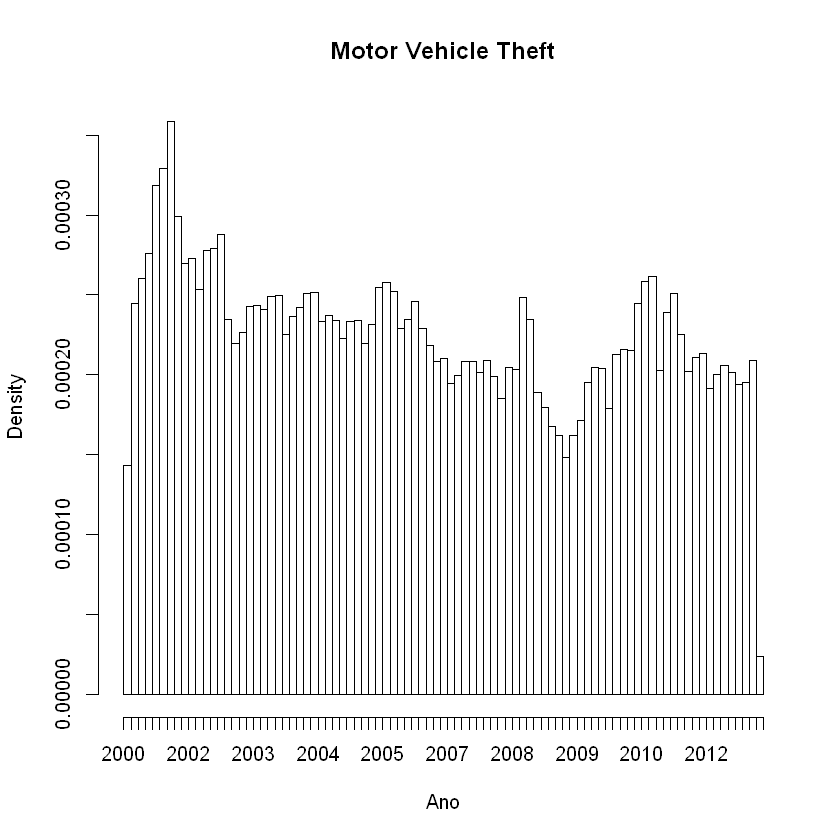

In [17]:
hist(MVT$Date, xlab = "Ano", main = "Motor Vehicle Theft", breaks=100)

Does it look like there were more crimes for which arrests were made in the first half of the time period or the second half of the time period?

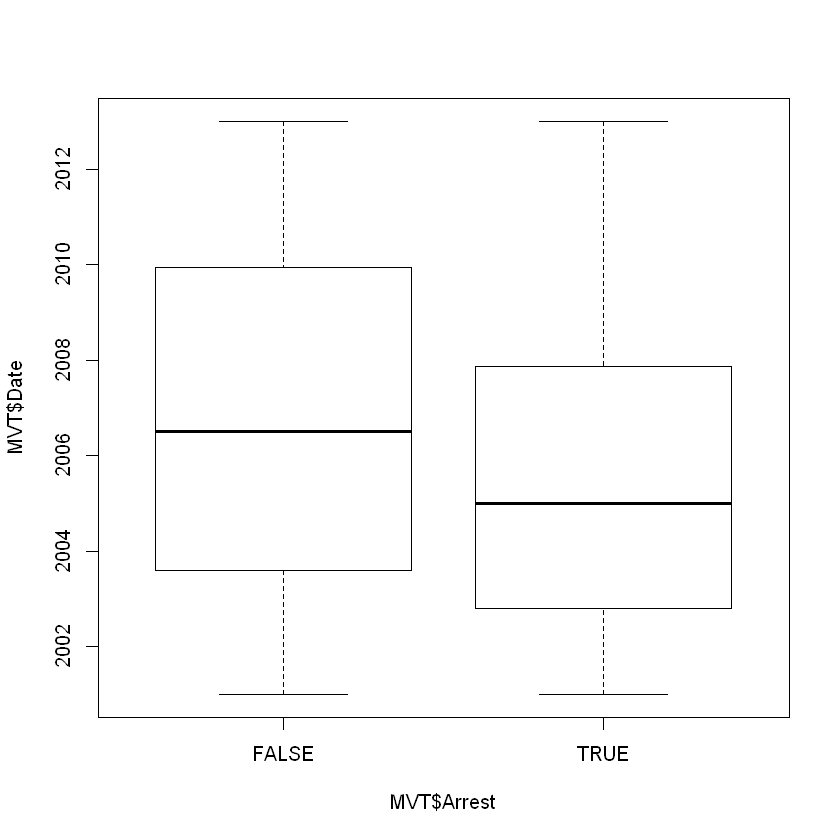

In [18]:
boxplot(MVT$Date ~ MVT$Arrest)

For what proportion of motor vehicle thefts in 2001 was an arrest made?

For what proportion of motor vehicle thefts in 2007 was an arrest made?

For what proportion of motor vehicle thefts in 2012 was an arrest made?

In [19]:
table(MVT$Year, MVT$Arrest)

      
       FALSE  TRUE
  2001 18517  2152
  2002 16638  2115
  2003 14859  1798
  2004 15169  1693
  2005 14956  1528
  2006 14796  1302
  2007 13068  1212
  2008 13425  1020
  2009 11327   840
  2010 14796   701
  2011 15012   625
  2012 13542   550

In [20]:
prop.table(table(MVT$Year, MVT$Arrest), margin=1)

      
            FALSE       TRUE
  2001 0.89588272 0.10411728
  2002 0.88721805 0.11278195
  2003 0.89205739 0.10794261
  2004 0.89959673 0.10040327
  2005 0.90730405 0.09269595
  2006 0.91912039 0.08087961
  2007 0.91512605 0.08487395
  2008 0.92938733 0.07061267
  2009 0.93096080 0.06903920
  2010 0.95476544 0.04523456
  2011 0.96003070 0.03996930
  2012 0.96097076 0.03902924

**Which locations are the top five locations for motor vehicle thefts, excluding the "Other" category?**

In [21]:
head(sort(table(MVT$LocationDescription), decreasing = T) , 6 )


                        STREET PARKING LOT/GARAGE(NON.RESID.) 
                        156564                          14852 
                         OTHER                          ALLEY 
                          4573                           2308 
                   GAS STATION         DRIVEWAY - RESIDENTIAL 
                          2111                           1675 

**How many observations are in Top5?**

In [22]:
Top5 = subset(MVT, LocationDescription=="STREET" |
              LocationDescription=="PARKING LOT/GARAGE(NON.RESID.)" | 
              LocationDescription=="ALLEY" |
              LocationDescription=="GAS STATION" |
              LocationDescription=="DRIVEWAY - RESIDENTIAL")

str(Top5)

'data.frame':	177510 obs. of  13 variables:
 $ ID                 : int  8951354 8951141 8952223 8951608 8950793 8950760 8951611 8951802 8950706 8951585 ...
 $ Date               : Date, format: "2012-12-31" "2012-12-31" ...
 $ LocationDescription: Factor w/ 78 levels "ABANDONED BUILDING",..: 72 72 72 72 72 72 72 72 72 72 ...
 $ Arrest             : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...
 $ Domestic           : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ Beat               : int  623 1213 724 211 2521 423 231 1021 1215 1011 ...
 $ District           : int  6 12 7 2 25 4 2 10 12 10 ...
 $ CommunityArea      : int  69 24 67 35 19 48 40 29 24 29 ...
 $ Year               : int  2012 2012 2012 2012 2012 2012 2012 2012 2012 2012 ...
 $ Latitude           : num  41.8 41.9 41.8 41.8 41.9 ...
 $ Longitude          : num  -87.6 -87.7 -87.7 -87.6 -87.8 ...
 $ Month              : chr  "December" "December" "December" "December" ...
 $ Weekday            : chr  "Monday" "Monday" "Monda

In [23]:
street <- MVT[MVT$LocationDescription=="STREET",]
parking_lot <- MVT[MVT$LocationDescription=="PARKING LOT/GARAGE(NON.RESID.)",]
alley <- MVT[MVT$LocationDescription=="ALLEY",]
gas_station <- MVT[MVT$LocationDescription=="GAS STATION",]
driveway <- MVT[MVT$LocationDescription=="DRIVEWAY - RESIDENTIAL",]

In [24]:
score <- c(nrow(street), nrow(parking_lot),nrow(alley),nrow(gas_station),nrow(driveway))
score

[1] 156564  14852   2308   2111   1675

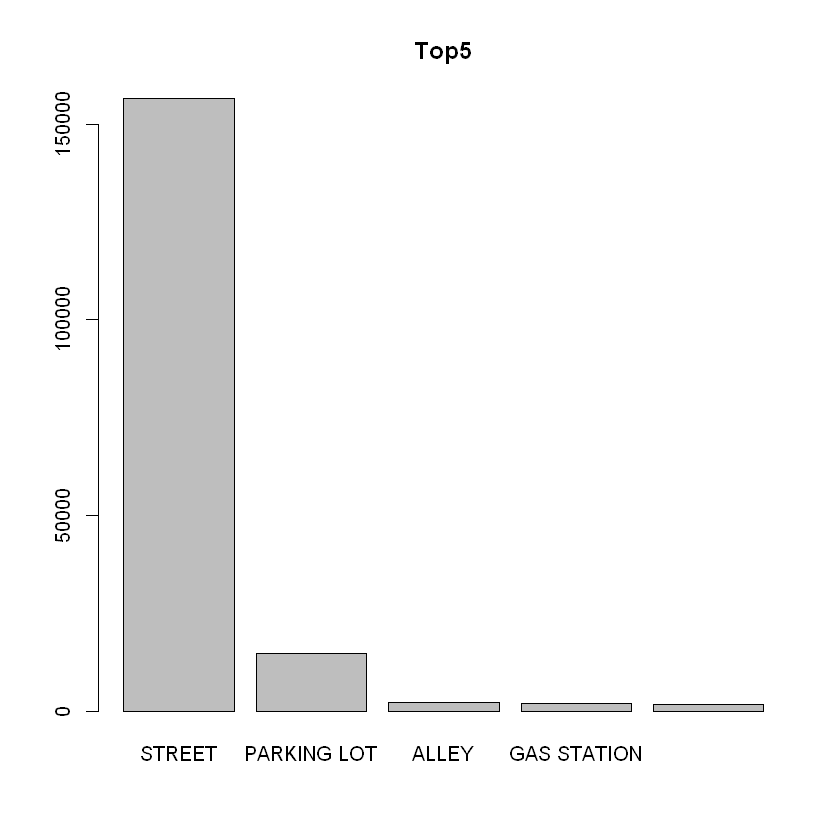

In [25]:
barplot(score, names.arg = c("STREET", "PARKING LOT", "ALLEY", "GAS STATION", "DRIVEWAY"), main = "Top5")

In [26]:
sum(score)

[1] 177510

**One of the locations has a much higher arrest rate than the other locations. Which is it?**

In [27]:
# Important to better visualization

Top5$LocationDescription = factor(Top5$LocationDescription)

In [28]:
prop.table(table(Top5$LocationDescription, Top5$Arrest), margin=1)

                                
                                      FALSE       TRUE
  ALLEY                          0.89211438 0.10788562
  DRIVEWAY - RESIDENTIAL         0.92119403 0.07880597
  GAS STATION                    0.79204169 0.20795831
  PARKING LOT/GARAGE(NON.RESID.) 0.89206841 0.10793159
  STREET                         0.92594083 0.07405917

Gas Station has by far the highest percentage of arrests, with over 20.8% of motor vehicle thefts resulting in an arrest.

**On which day of the week do the most motor vehicle thefts at gas stations happen?**

In [29]:
table(Top5$LocationDescription=='GAS STATION', Top5$Weekday)

       
        Friday Monday Saturday Sunday Thursday Tuesday Wednesday
  FALSE  26746  25008    24917  24220    24956   24527     25025
  TRUE     332    280      338    336      282     270       273

Saturday is the day where most motor vehicle thefts at gas stations occur.

**On which day of the week do the fewest motor vehicle thefts in residential driveways happen?**

In [30]:
table(Top5$LocationDescription=='DRIVEWAY - RESIDENTIAL', Top5$Weekday)

       
        Friday Monday Saturday Sunday Thursday Tuesday Wednesday
  FALSE  26821  25033    25053  24335    24975   24554     25064
  TRUE     257    255      202    221      263     243       234

In [31]:
table(Top5$LocationDescription, Top5$Weekday)

                                
                                 Friday Monday Saturday Sunday Thursday Tuesday
  ALLEY                             385    320      341    307      315     323
  DRIVEWAY - RESIDENTIAL            257    255      202    221      263     243
  GAS STATION                       332    280      338    336      282     270
  PARKING LOT/GARAGE(NON.RESID.)   2331   2128     2199   1936     2082    2073
  STREET                          23773  22305    22175  21756    22296   21888
                                
                                 Wednesday
  ALLEY                                317
  DRIVEWAY - RESIDENTIAL               234
  GAS STATION                          273
  PARKING LOT/GARAGE(NON.RESID.)      2103
  STREET                             22371

Saturday is the day where fewer motor vehicle thefts at residential driveways occur.